In [ ]:
## Input Data Summary

# Input data set is patient level data with age, sex and contains categorical, binary and numeric variables 
# with information about patient's characteristics and the output variable of Thyroid which signifies 
# that if the patient has Thyroid or not.

# The input data set has some missing values which are needed to be filled in pre processing stage
# In the data pre processing, I extrapolated the missing values with the mean of numercial columns 
# and mode of categorical columns, also the for the categorical variables I converted them into binary flags
# to simplify the process of model creation.

# I used the decision tree classification model to train the model and predict output of Thyroid. Decision tree model
# was chosen because there are multiple type of input variables like categorical, numeric, binary and decision tree
# with splitting algorithm can handle multiple type of variables with better accuracy and can break down multiple 

# Evaluation of model is calculated with ROC-AUC value and Accuracy score which comes around 0.9918, 
# which indictes high accuracy and performance of model


/Users/sushmitsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


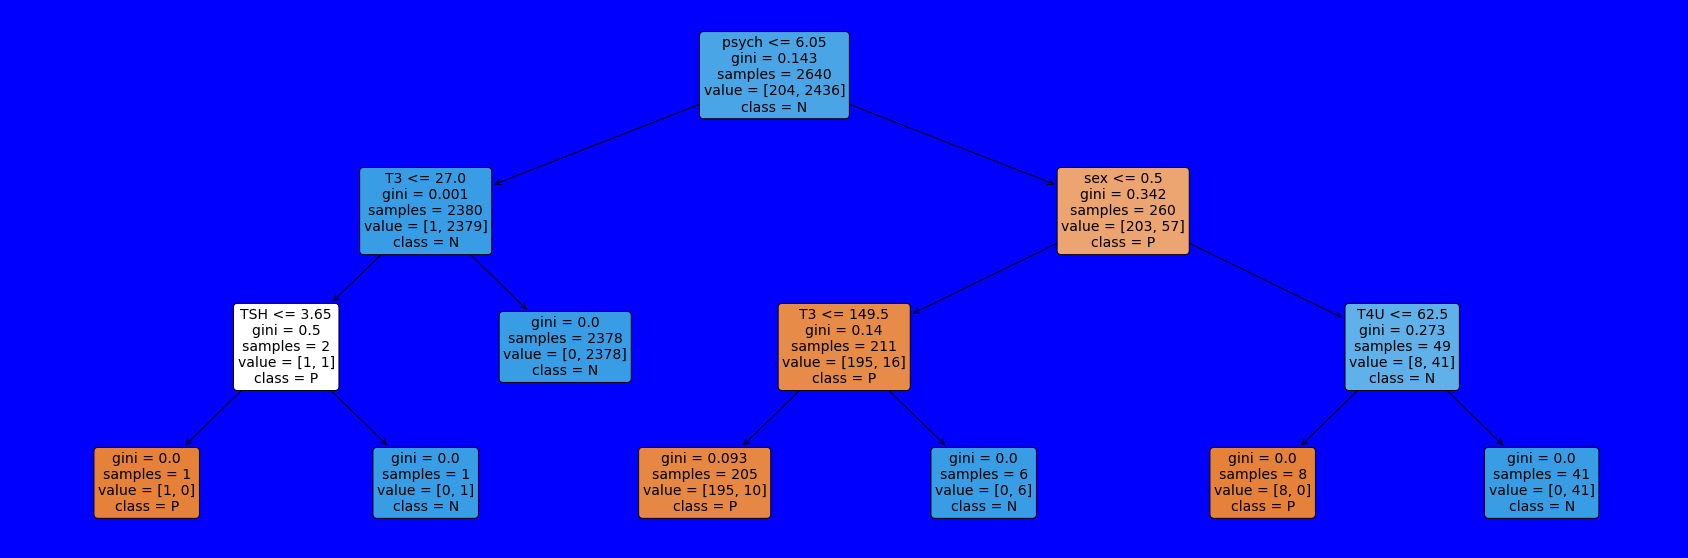

AUC = 99.1860529066 %
Accuracy = 99.1860529066 %


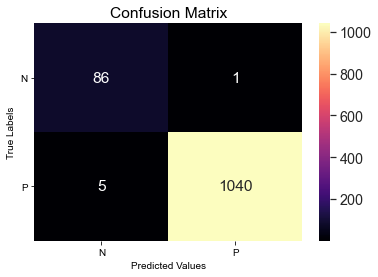

<Figure size 720x504 with 0 Axes>

In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn import metrics  
import seaborn as sns  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score

#reading the input dataset
df = pd.read_csv('/Users/sushmitsharma/Downloads/thyroid.csv')

##preprocessing the data

#replacing all the '?' with NA
df = df.replace('?', np.NaN)

#filling the missing values in input data set
df['age'] = df['age'].fillna(df['age'].astype(float).mean())
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['TSH'] = df['TSH'].fillna(df['TSH'].astype(float).mean())
df['T3'] = df['T3'].fillna(df['T3'].astype(float).mean())
df['TT4'] = df['TT4'].fillna(df['TT4'].astype(float).mean())
df['T4U'] = df['T4U'].fillna(df['T4U'].astype(float).mean())
df['FTI'] = df['FTI'].fillna(df['FTI'].astype(float).mean())

#converting 'true' and 'false' flags in numerical form
df = df.replace('t',1)
df = df.replace('f',0)

# Separating the independent dependent variables of the dataset  
x = df.drop(columns = "Thyroid")  
y = df["Thyroid"]
names_features = x.columns
target_labels = y.unique()

#encoding the categorical column 'sex'
x_encoded_sex = pd.get_dummies(x['sex'])

x_encoded = x.join(x_encoded_sex).drop(['sex'], axis = 1)

# Splitting the dataset into training and testing datasets  
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size = 0.3, random_state = 93)  

x_train.reindex()
x_test.reindex()


# Creating an instance of the classifier class  
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 93)  
    
# Fitting the training dataset to the model  
dtc.fit(x_train, y_train)

# Plotting the Decision Tree  
plt.figure(figsize = (30, 10), facecolor = 'b')  
Tree = tree.plot_tree(dtc, feature_names = names_features, class_names = target_labels, rounded = True, filled = True, fontsize = 14)  
plt.show()
y_pred = dtc.predict(x_test)

# Finding the confusion matrix  
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
matrix = pd.DataFrame(confusion_matrix)  
axis = plt.axes()  
sns.set(font_scale = 1.3)  
plt.figure(figsize = (10,7))  
  
# Plotting heatmap  
sns.heatmap(matrix, annot = True, fmt = "g", ax = axis, cmap = "magma")  
axis.set_title('Confusion Matrix')
axis.set_xlabel("Predicted Values", fontsize = 10)  
axis.set_xticklabels(list(['N','P']))
axis.set_ylabel( "True Labels", fontsize = 10)
axis.set_yticklabels(list(['N','P']), rotation = 0) 


#Model Evaluation Metrics - AUC, Accuracy
y_test = y_test.replace('P', 1)
y_test = y_test.replace('N', 0)
y_pred = pd.DataFrame(y_pred).replace('P', 1)
y_pred = pd.DataFrame(y_pred).replace('N', 0)

auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC = ' + (round(100*auc,10)).astype('str') + ' %')

accuracy_score = balanced_accuracy_score(y_test, y_pred)
print('Accuracy = ' + (round(100*accuracy_score,10)).astype('str') + ' %')


In [3]:
import pickle

pickle_out = open("model.pkl", "wb")
pickle.dump(dtc, pickle_out)
pickle_out.close()